In [68]:
from dependencies import *

### Load in data

In [69]:
## Long term pCO2 - Krissansen-Totton et al. 2018

all_output = np.load('data/kt_data.npy')
t_KT = all_output[4,:,0]/1e9
confidence_CO2 = st.scoreatpercentile(all_output[6,:,:],
                                      [2.5,50,97.5], # lower 95% confidence interval, median, and upper 95% confidence interval
                                      interpolation_method='fraction',axis=1)
CO2_KT = confidence_CO2*1e6 # convert to ppm

In [70]:
## Phanerozoic pCO2 - Foster et al. 2017

df = pd.read_excel('data/foster-2017.xlsx',skiprows=1)
t_Foster = np.array(df['Age (Ma)'])
df[df < 0] = 1 # clip negative values

confidence_CO2_df = df[['lw95%','pCO2 probability maximum','up95%']]
CO2_Foster = confidence_CO2_df.to_numpy().T

In [71]:
## Model outputs from geologic_generate script

data_KT_small = np.load('data/geologic_KT_small.npy')
data_KT_large = np.load('data/geologic_KT_large.npy')
data_Foster_small = np.load('data/geologic_Foster_small.npy')
data_Foster_large = np.load('data/geologic_Foster_large.npy')

### Plot

In [72]:
# helper function to plot data with confidence intervals
def plot_interval(ax,
                  t_arr, # time array of length N
                  data, # should be shape 3xN representing lower bound, central line, upper bound
                  ls='-',label=None):
    ax.plot(t_arr,data[1],c='k',ls=ls,label=label)
    ax.fill_between(t_arr,data[0],data[2],color='grey',alpha=0.2)

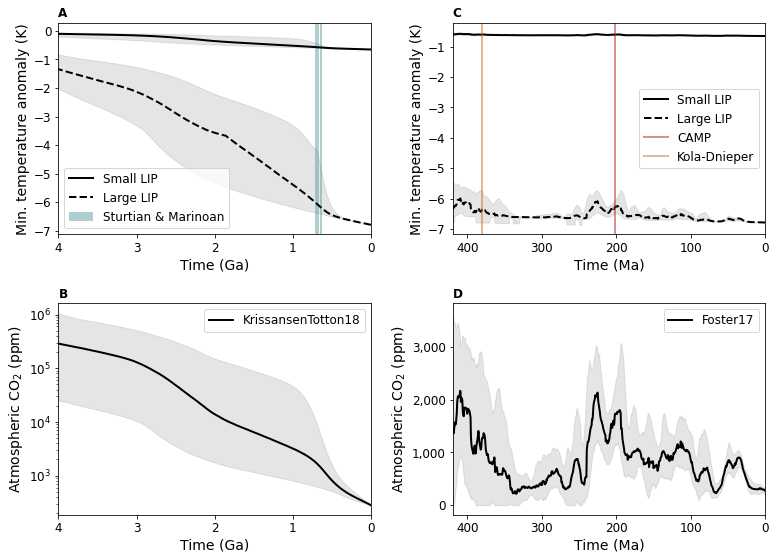

In [80]:
plt.rcParams.update({'legend.fontsize':12,
                     'font.size':14,
                     'axes.labelsize':14,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'lines.linewidth':2})

fig,axs = plt.subplots(2,2,figsize=(11,8))

## Top left: long-term model results
ax = axs[0,0]
plot_interval(ax,t_KT,data_KT_small,label='Small LIP')
plot_interval(ax,t_KT,data_KT_large,label='Large LIP',ls='--')

# plot snowball vertical lines
ax.axvspan(.717,.660,alpha=0.5,facecolor='cadetblue',edgecolor='None',label='Sturtian & Marinoan')
ax.axvspan(.650,.632,alpha=0.5,facecolor='cadetblue',edgecolor='None')

## Top right: Phanerozoic model results
ax = axs[0,1]
plot_interval(ax,t_Foster,data_Foster_small,label='Small LIP')
plot_interval(ax,t_Foster,data_Foster_large,label='Large LIP',ls='--')
# to match ylims
ax.axhline(-6,alpha=0)

# plot Phanerozoic LIP vertical lines
ax.axvline(201,c='firebrick',label='CAMP',alpha=0.5)
ax.axvline(380,c='chocolate',label='Kola-Dnieper',alpha=0.5)

## Bottom left: long-term CO2 data
ax = axs[1,0]
plot_interval(ax,t_KT,CO2_KT,label='KrissansenTotton18')
ax.set_yscale('log')

## Bottom right: Phanerozoic CO2 data
ax = axs[1,1]
plot_interval(ax,t_Foster,CO2_Foster,label='Foster17')
ax.set_yticks([0,1000,2000,3000])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

## format
for i,ax in enumerate(axs.flatten()): # all
    ax.set_title(['A','C','B','D'][i],loc='left',fontweight='bold')
    ax.legend()
for ax in axs[1]: # CO2 plots
    ax.set_ylabel('Atmospheric CO$_2$ (ppm)')
for ax in axs[0]: # Model result plots
    ax.set_ylabel('Min. temperature anomaly (K)')
for ax in axs[:,0]: # Long-term plots
    ax.set_xlabel('Time (Ga)')
    ax.set_xlim(np.max(t_KT),np.min(t_KT))
    ax.set_xticks([4,3,2,1,0])
for ax in axs[:,1]: # Phanerozoic plots
    ax.set_xlabel('Time (Ma)')
    ax.set_xlim(np.max(t_Foster),np.min(t_Foster))
    ax.set_xticks([400,300,200,100,0])

plt.tight_layout()
plt.savefig('figs/geologic_time'+'.jpg',format='jpg',bbox_inches='tight',dpi=600)
plt.show()